# Credit Card Fraudulent Transactions

This is a python project to detect credit card fraudulent transactions. The project entails use of several machine learning algorithms that will be able to  distinguish the fraudulent transaction from the non fraudulent transactions.

## Loading the python libraries

In [1]:
# numpy library
import numpy as np
# pandas library
import pandas as pd
# matplotlib library
import matplotlib.pyplot as plt
# seaborn library
import seaborn as sns 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import classification_report

## Importing the Data set

In [2]:
# loading the data from a csv file 
df = pd.read_csv('creditcard.csv')


## Exploratory Data Analysis

In [3]:
# Pandas profiling to provide a brief description of the data
import pandas_profiling 
pandas_profiling.ProfileReport(df)

* The data set contains duplicated 1081 rows.
* Majority of the columns contain numerical data types
* The data Set has no missing values

In [4]:
# display the data | First five columns 
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
# the shape of the data 
print('The shape of the data:',df.shape)

The shape of the data: (284807, 31)


In [6]:
# statistical description column amount
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
# removing the duplicated columns
df[df.duplicated()] # dataframe containing the duplicated rows
df.drop_duplicates(keep = 'first', inplace = True) # drop the duplicated column, keep first unique column 
print('The shape of the dataframe after dropping the duplicated columns:',df.shape)

The shape of the dataframe after dropping the duplicated columns: (283726, 31)


## Data Modeling 

In [8]:
# splitting into attributes and labels
X = df.drop('Class', axis = 1) # attributes
y = df['Class'] # the labels

In [9]:
# the labels
print(y.unique())
print(y.value_counts())

[0 1]
0    283253
1       473
Name: Class, dtype: int64


* 0 Represents the non_fradulent transcations
* 1 Repesents the fradulent transcations

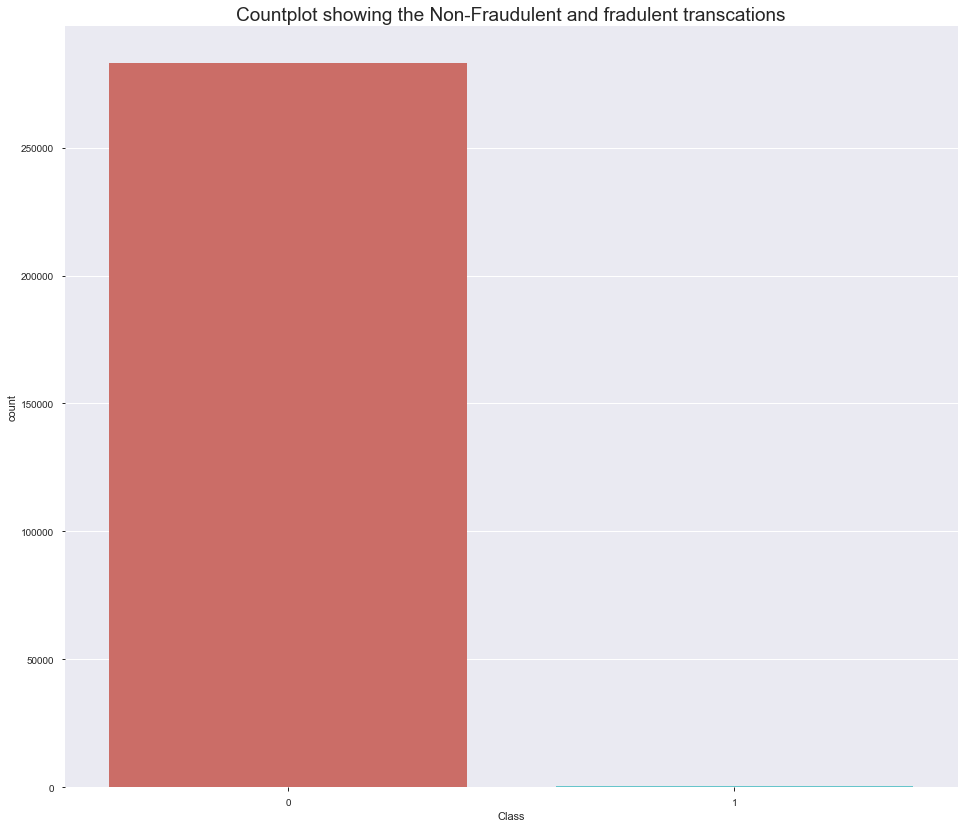

In [10]:
# count plot showing the transcations
plt.figure(figsize = (16,14))
sns.countplot(x = 'Class', data = df, palette = 'hls')
plt.title("Countplot showing the Non-Fraudulent and fradulent transcations", fontsize = 19)
plt.show()

In [11]:
# splitting the data into train and test
# test size set at 25% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# fitting the logistic regression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/home/antonny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# retrieve the intercept 
print(regressor.intercept_)
# retrieve the slope
print(regressor.coef_)

[-2.21456238]
[[-6.37387552e-05  3.03974281e-01 -4.53602527e-01 -8.65894585e-01
   1.77109129e-01  8.18017963e-02 -7.12800812e-02  4.58503363e-01
  -3.94757640e-01 -4.28553193e-01 -2.89091103e-01 -3.39382719e-01
   2.94996319e-03 -3.30087337e-01 -6.82036524e-01 -5.57537694e-01
  -3.22368956e-01 -4.40866020e-01  6.75864276e-02  1.54171892e-02
   1.65385281e-01  3.73399875e-01  4.70838859e-01  1.51247468e-01
  -1.89216872e-02 -5.04568354e-01  1.08347229e-01 -1.12720364e-01
   2.41701687e-02 -5.35628377e-03]]


In [14]:
# use the model to make predictions
y_pred = regressor.predict(X_test)

In [15]:
# make a dataframe to compare the predicted and the actual
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.tail(15)

Actual  Predicted
155238       0          0
74390        0          0
42693        0          0
67108        0          0
70264        0          0
280792       0          0
112919       0          0
254492       0          0
279340       0          0
134653       0          0
23934        0          0
221887       0          0
283585       0          0
11190        0          0
237314       0          0

### Model performance

In [16]:
# using confusion matrix to evaluate the model
confusion_matrix(y_test, y_pred)

array([[56646,    13],
       [   44,    43]])

* True Positive: 56646 was predicted to be non fradulent and was non fradulent 
* True Negative: 43 was predicted to be fradulent and was fradulent
* False Positive: 13 was predicted to be non fradulent but were fradulent
* False negative: 44 was predicted to be fradulent and was fradulent 



In [17]:
print('The Accuracy: ',np.round(accuracy_score(y_test, y_pred),5) * 100, '%')

The Accuracy:  99.9 %


* Despite the Accuracy of the model being close to 100% , this can't be used to evaluate the model beacuse of imbalanced number of fradulent and non_fradulent transcations

In [18]:
# using classification report for better evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.77      0.49      0.60        87

   micro avg       1.00      1.00      1.00     56746
   macro avg       0.88      0.75      0.80     56746
weighted avg       1.00      1.00      1.00     56746



* The precision score, recall and f1-score are best to evaluate the model
* The precision indicates the % of fraudulent transactions predicted by the machine aganist the total fraudulent transcation which is 77%
* The recall indicates the percentage of true fraudulent transactions predicted by the machine aganist fraudulent transactions predicted by the machine which is 49% 
* The f1 score is the balance between the recall and precision ie the truly predicted fraudulent transactions from the fraudulent transactions and the proportion of actual fraudulent that is correctly classified where the score is 60%

## Quantifying the quality of predictions

In [19]:
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv = 10, scoring = 'precision').mean())

/home/antonny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/antonny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/antonny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/antonny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/antonny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

0.8333612069746404


Comparing the mean from the precision, a different model can be used to determine fradulent and non fradulent transcations.

### DECISION TREES

In [20]:
# splitting into attributes and labels
X = df.drop('Class', axis = 1) 
test_features = X
y = df['Class']

In [21]:
# split the attributes into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# function to perform training with entropy
dec_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 4,
                                           min_samples_split = 2, random_state = 0)
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [23]:
# making predictions
des_pred = dec_clf.predict(X_test)

In [24]:
# comparison with actual
des_compare = pd.DataFrame({'Actual':y_test, 'predicted':des_pred})
des_compare.head(15)

Actual  predicted
266174       0          0
34029        0          0
55925        0          0
225716       0          0
198821       0          0
27926        0          0
168070       0          0
190842       0          0
95597        1          1
280578       0          0
110327       0          0
1201         0          0
58690        0          0
96849        0          0
175841       0          0

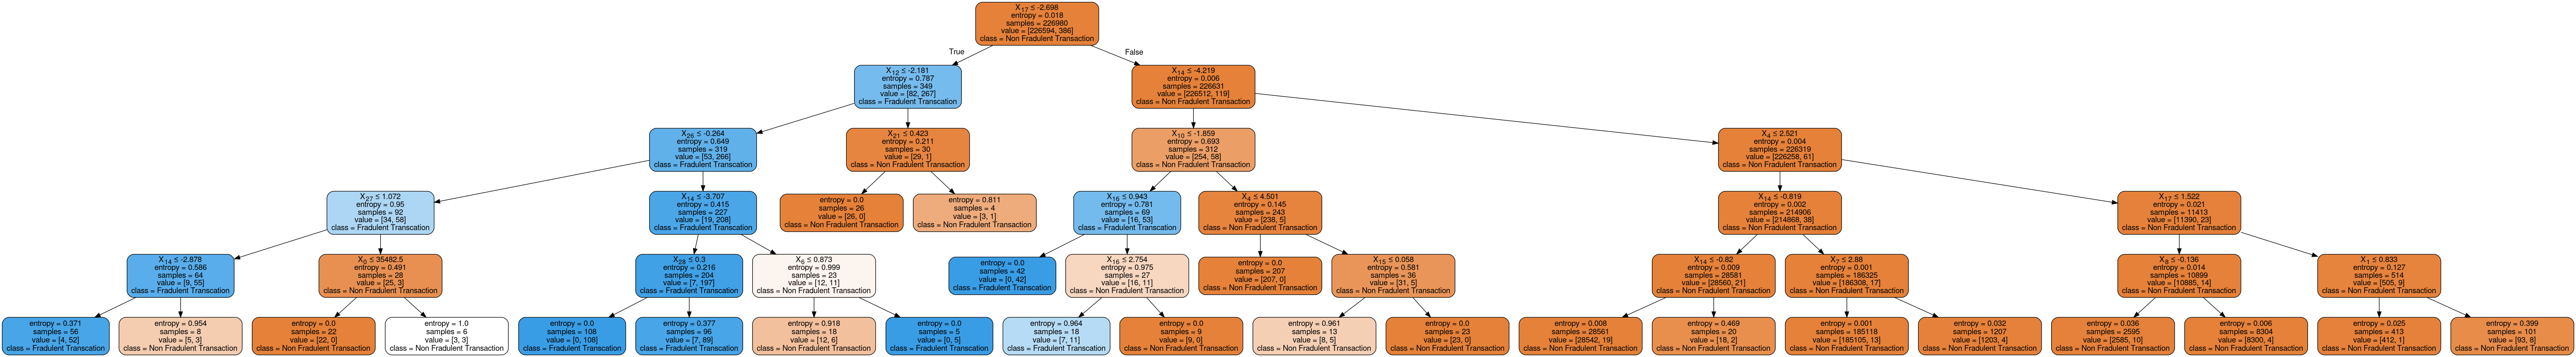

In [27]:
# creating the decision tree Image 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dec_clf.fit(X_train, y_train), out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['Non Fradulent Transaction', 'Fradulent Transcation'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_card_transcation.png')
Image(graph.create_png())

## Decision Tree Model performance

In [28]:
# using confusion matrix
confusion_matrix(y_test, des_pred)

array([[56651,     8],
       [   21,    66]])

* True Positives: 56651 non fradulent transactions were predicted to be fradulent
* True Negatives: 66 fradulent transactions were predicted to be fradulent
* False positives: 8 fradulent transactions were predicted to non fradulent
* False Negatives: 21 Non fradulent transactions were predicted to be fradulent 

In [29]:
# accuracy score 
print('The accuracy is:',np.round(accuracy_score(y_test, des_pred) * 100, 2),'%')

The accuracy is: 99.95 %


The higher accuracy is attributed to the high number of non fradulent transactions hence cant be used for the prediction  

In [30]:
# classification report
print(classification_report(y_test, des_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.89      0.76      0.82        87

   micro avg       1.00      1.00      1.00     56746
   macro avg       0.95      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



* The precision score indicates the percentage of the number of fradulent transactions aganist the total fradulent transactions , that is , 89 %
* The recall score indicates the percentage of true fradulent transactions aganist the predicted fradulent transactions, that is 76 % 
* The f1-score of the model is the balance between the accurately predicted fradulent transactions and number of accurately predicted fradulent transactions, that is 82%
* There is improvement in the scores compared to the logistic regression .
* Trying to improve the model using random forest.

## Random Forest

In [33]:
# separate the target variables
y = np.array(df['Class'])
# remove the label from the attributes
features = df.drop('Class', axis = 1)
# get the names of the columns
features_list = list(features.columns)

X = np.array(features)

In [34]:
# Splitting into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
# chech the shape of the training and test data sets
print('Training attributes:',X_train.shape)
print('Training labels:',y_train.shape)
print('Testing attributes:',X_test.shape)
print('Testing labels:',y_train.shape)

Training attributes: (226980, 30)
Training labels: (226980,)
Testing attributes: (56746, 30)
Testing labels: (226980,)


In [36]:
# creating a random forest classifier function with 100 number of decision trees
ranf = RandomForestClassifier(n_estimators = 100, random_state = 0)
# training on train data 
ranf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
# making predictions 
ranf_pred = ranf.predict(X_test)

In [38]:
# comparison with actual
ranf_compare = pd.DataFrame({'Actual':y_test, 'predicted':ranf_pred})
ranf_compare.head(15)

Actual  predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        1          1
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0

In [39]:
dot_data = StringIO()
# pull out one of the tree from the forest
tree = ranf.estimators_[78]
# export the image to a dot file 
export_graphviz(tree, out_file = dot_data,
               filled = True, rounded = True, special_characters = True,
               feature_names = features_list,
               class_names=['Non Fradulent Transaction', 'Fradulent Transcation'])
# use dot file to create a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credit_card_transactions.png')
# write a graph to a png file
Image(graph.create_png())

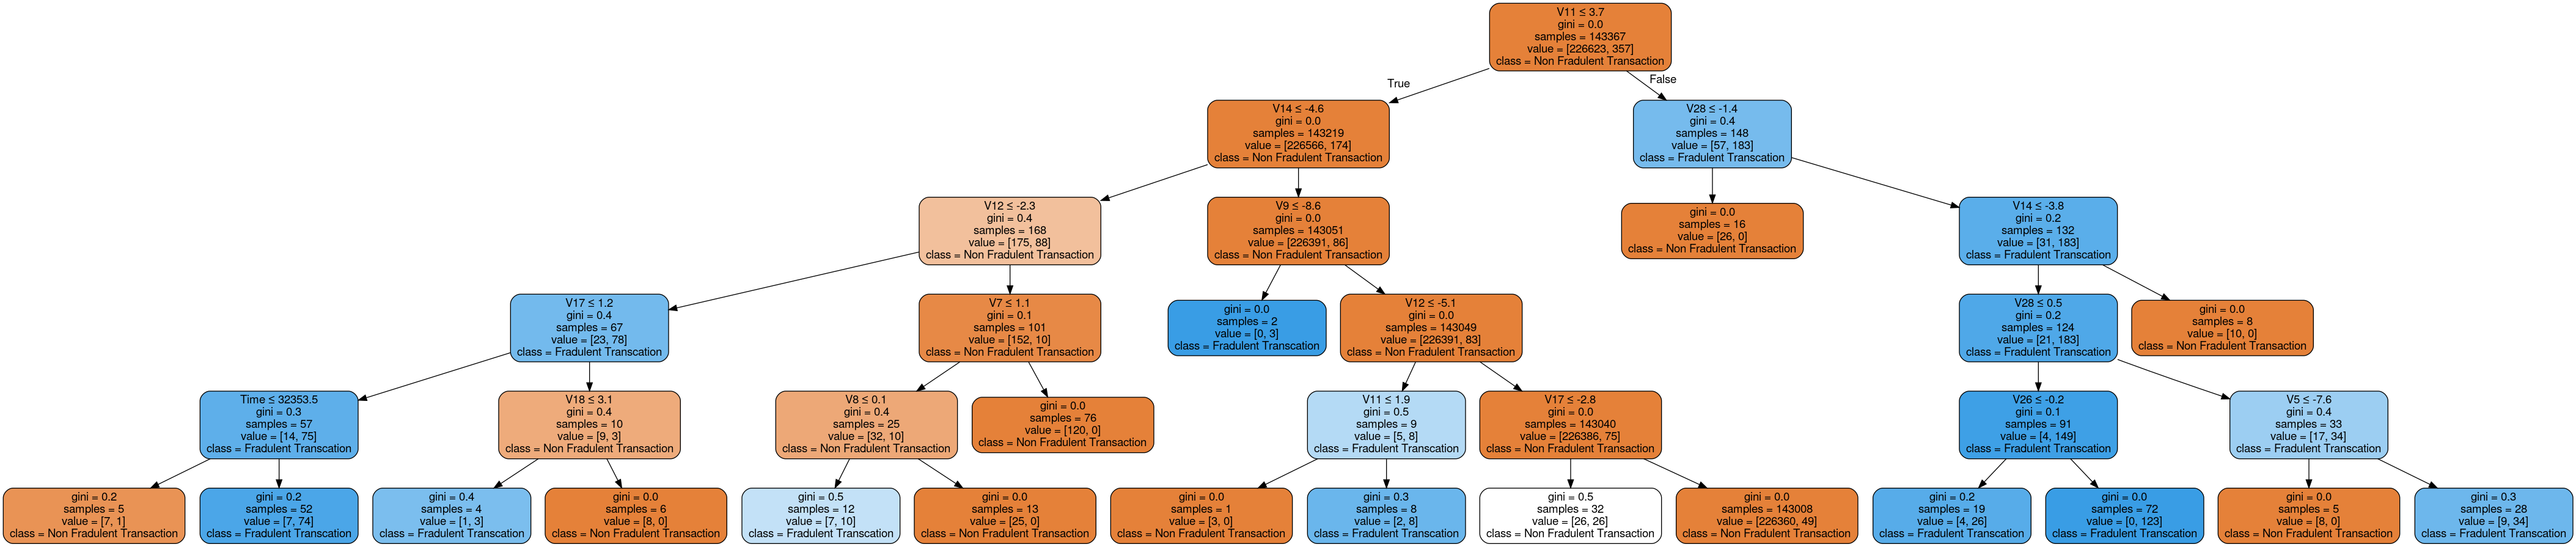

In [40]:
# limiting the depth of the tree to 5 levels
import pydot
rf_small = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rf_small.fit(X_train, y_train)

# extract the small tree
tree_small = rf_small.estimators_[6]
# save the tree as a png image 
export_graphviz(tree_small, out_file = 'small_tree.dot',
              filled = True, rounded = True, special_characters = True,
              feature_names = features_list, precision = 1,
               class_names=['Non Fradulent Transaction', 'Fradulent Transcation'])
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')
Image(graph.create_png())

## Model Evaluation

In [42]:
# Using confusion matrix
confusion_matrix(y_test, ranf_pred)

array([[56655,     4],
       [   20,    67]])

* True Positives: 56655 non fradulent transactions were predicted to be fradulent
* True Negatives: 67 fradulent transactions were predicted to be fradulent
* False positives: 4 fradulent transactions were predicted to non fradulent
* False Negatives: 20 Non fradulent transactions were predicted to be fradulent 

In [43]:
# using classification report 
print(classification_report(y_test, ranf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.94      0.77      0.85        87

   micro avg       1.00      1.00      1.00     56746
   macro avg       0.97      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



* The precision has increased to 94 %
* Recall has increased to 77 %
* The f1-score has improved to 85 %
* Random forest has performed better than the decision tree and logistic model

# Conclusion

* The Random forest algorithm performed best compared to logistic classifier and Random forest Classifier
as it had higher precision score.
* Therefore the Random Forest algorithm is preferred.
* Model can be improved with more data on fradulent transactions and using a boosting algorithm 